# Расчетно-графическая работа
# Моделирование двигателя постоянного тока

### Цель работы: приобретение практических навыков в области построения математических моделей и реализации процессов моделирования электрических машин постоянного тока, используя современное ППО.

## 1. Теоретическое описание объекта


Уравнение электрической цепи двигателя постоянного тока описывается известным уравнением, которое строится на основе закона Кирхгофа и имеет следующий вид: 

$$
                                            U(t)= E(t) + IR + L \frac{dI}{dt}.   \qquad  \qquad \qquad  \qquad\qquad\qquad (1)
$$


где  $E = \omega\cdot Km$ ¬ противо-ЭДС, $\omega $ ¬ угловая скорость вала двигателя, $Km$ - электромагнитный коэффициент, который можно считать равый коэфициенту двигателя.


Связь крутящего мСвязь крутящего момента, развиваемого двигателем с нагрузкой и ускорением ротора двигателя можно описать,
используя дифференциальное уравнение вращательного движения: омента, развиваемого двигателем с нагрузкой и ускорением ротора двигателя можно описать, используя дифференциальное уравнение вращательного движения:
$$
        J\frac{d\omega }{dt} = Mk - Mc.  \qquad  \qquad \qquad  \qquad\qquad\qquad \qquad (2)
$$

где $Mk = Km\cdot\omega $ - крутящий момент на валу двигателя, $Mc = f\cdot\omega $ - момент сопротивления движению, $f$ - коэффициент вязкостного трения, $J$ - момент инерции.

С целью моделирования процесса изменения угловой скорости $\omega(t)$ ротора двигателя в зависимости от питающего напряжения $U(t)$ перепишим уравнения (1) и (2) в виде последовательно соединенных передаточных функций.

Будем считать, что уравнение (1) является преобразователем напряжения в силу тока, тогда передаточная функция, описывающая данное преобраование примет вид:
$$
W1 =  \frac{1}{(Lp + R)}, \qquad  \qquad \qquad  \qquad\qquad\qquad \qquad  \qquad(3)
$$
где $p$ - оператор дифференцирования Лапласа ($p= \frac{d}{dt}$)

Аналогичным образом представим передаточную функцию, преобразующую силу тока в обмотках якоря (ротора) в крутящий момент развиваемый двигателем:

$$
W2 =  \frac{1}{(Jp + f)}, \qquad  \qquad \qquad  \qquad\qquad\qquad \qquad  \qquad(4)
$$

Последовательное соединение передаточных функций w1 и w2 предсавлено на рис. ниже.
![1](img/1.png)


#### Пояснения к формуле (3).

Уравнение (1) можно записать в виде:

$$
                                            U(t)- E(t) = IR + L \frac{dI}{dt}.   
$$

или с учетом обозначения $p= \frac{d}{dt}$ 

$$
                                            U(t)- E(t) = I(t)R + LI(t)p.  
$$

Или

$$
                                            U(t)- E(t) = I(t)(R + L\cdot p).   
$$

Принимая во внимание, что передаточная функция - это отношение изображения по Лапласу выходного сигнала к входному, запишим:

$$
                                            W1 =\frac{выход(р)}{вход(р)} =\frac{I(t)}{U(t)- E(t)} = \frac{1}{(R + L\cdot p)}.   
$$

## 2.Реалиация процесса моделирования

#### Подключение пакетов библиотек

In [1]:
from control.matlab import *
from numpy import *
import matplotlib.pyplot as plt

#### Ввод исходных данных

In [5]:
L = 0.0128; # L - Индуктивность, R - сопротивление, Kf - коэффициент трения, J - момент инерции и т.д.
R = 6;
Kf = 0.02;
J = 0.024;
Un = 110;
In = 3;
n = 1000;
w=pi*n/30;
Km = w/(Un-In*R);
Kd=Km;

Задание передаточных функций

In [6]:
w1=tf(1, [L, R]);

print('w1 =' + str(w1) );
print("_____________________")

w2=tf(1, [J, Kf]);

print('w2 =' + str(w2));

w1 =
      1
------------
0.0128 s + 6

_____________________
w2 =
      1
--------------
0.024 s + 0.02



Зададим коэффициент обратной связи

In [7]:
Wkm=tf(Km,[1]);
print("Wkm = "+ str(Km));

Wkm = 1.1382582078223888


#### Запишим обобщенную передаточную функцию.

In [13]:
W=w1*w2;

In [14]:
W


               1
-------------------------------
0.0003072 s^2 + 0.1443 s + 0.12

#### Запишим итоговую модель с обратной связью

In [15]:
w = feedback(W, Wkm);

In [16]:
w


                1
--------------------------------
0.0003072 s^2 + 0.1443 s + 1.258

#### Оптередим переходую харакеристику двигателя, используя функцию step()

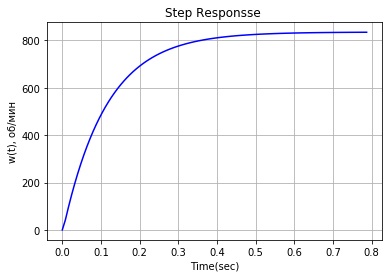

In [17]:
y,x=step(w*110*9.55)
plt.plot(x,y,"b")
plt.title('Step Responsse ') 
plt.ylabel('w(t), об/мин')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

#### Построим импульсную характеристику

In [18]:
y,x=impulse(w)

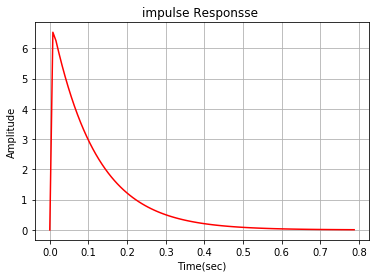

In [19]:
plt.plot(x,y,"r")
plt.title('impulse Responsse ') 
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

## Вывод.
В ходе работы была построена математическая модель двигателя постоянного тока, используя методологию построения передаточных функций. Адекватность полученной модели проверена численным моделированием.